In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional, GRU
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/driver/')


Mounted at /content/driver/


In [ ]:
dataset_path = ('/content/driver/MyDrive/dataset/geant-flat-tms.csv')
df = pd.read_csv(dataset_path)

In [ ]:
od_number = 13
dataset = df.iloc[:, od_number]
dataset = dataset.astype('float32')
dataset = dataset.values
dataset = np.reshape(dataset,(-1,1))
dataset

array([[ 996.1244],
       [4139.5557],
       [1675.3867],
       ...,
       [3845.4756],
       [2979.369 ],
       [5022.3467]], dtype=float32)

In [ ]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
	    a = dataset[i:(i+look_back), 0]
	    dataX.append(a)
	    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("train_data_size: " + str(trainX.shape[0]), " test_data_size: " + str(testX.shape[0]))

train_data_size: 8605  test_data_size: 2144


In [ ]:

vanilla_lstm = Sequential()
vanilla_lstm.add(LSTM(100, input_dim=look_back, activation="relu"))
vanilla_lstm.add(Dense(1))
vanilla_lstm.compile(loss='mean_squared_error', optimizer='adam')

vanilla_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               44400     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 44,501
Trainable params: 44,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:

Bilstm_model = Sequential()
Bilstm_model.add(Bidirectional(LSTM(100, input_dim=look_back, activation="relu")))
Bilstm_model.add(Dense(1))
Bilstm_model.compile(loss='mean_squared_error', optimizer='adam')

Bilstm_model.build(input_shape = (trainX.shape[0],1,10))
Bilstm_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (8605, 200)              88800     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (8605, 1)                 201       
                                                                 
Total params: 89,001
Trainable params: 89,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:

gru = Sequential()
gru.add(GRU(100, input_dim=look_back, activation="relu"))
gru.add(Dense(1))
gru.compile(loss='mean_squared_error', optimizer='adam')

gru.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 100)               33600     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 33,701
Trainable params: 33,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vanilla_lstm.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
189/189 - 4s - loss: 2.0930e-04 - val_loss: 9.5821e-05 - 4s/epoch - 20ms/step
Epoch 2/200
189/189 - 1s - loss: 1.8564e-04 - val_loss: 7.1709e-05 - 1s/epoch - 6ms/step
Epoch 3/200
189/189 - 1s - loss: 1.6945e-04 - val_loss: 5.6812e-05 - 975ms/epoch - 5ms/step
Epoch 4/200
189/189 - 1s - loss: 1.6029e-04 - val_loss: 4.9925e-05 - 986ms/epoch - 5ms/step
Epoch 5/200
189/189 - 1s - loss: 1.5456e-04 - val_loss: 4.5399e-05 - 994ms/epoch - 5ms/step
Epoch 6/200
189/189 - 1s - loss: 1.5298e-04 - val_loss: 4.1584e-05 - 959ms/epoch - 5ms/step
Epoch 7/200
189/189 - 1s - loss: 1.5043e-04 - val_loss: 4.0551e-05 - 969ms/epoch - 5ms/step
Epoch 8/200
189/189 - 1s - loss: 1.4938e-04 - val_loss: 4.8510e-05 - 1s/epoch - 5ms/step
Epoch 9/200
189/189 - 1s - loss: 1.4847e-04 - val_loss: 4.3910e-05 - 989ms/epoch - 5ms/step
Epoch 10/200
189/189 - 1s - loss: 1.4528e-04 - val_loss: 4.1121e-05 - 1s/epoch - 7ms/step
Epoch 11/200
189/189 - 2s - loss: 1.4281e-04 - val_loss: 3.9761e-05 - 2s/epoch - 9ms/step


In [ ]:
Bilstm_model.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
189/189 - 6s - loss: 2.1152e-04 - val_loss: 9.3583e-05 - 6s/epoch - 31ms/step
Epoch 2/200
189/189 - 1s - loss: 1.8545e-04 - val_loss: 6.8568e-05 - 1s/epoch - 8ms/step
Epoch 3/200
189/189 - 2s - loss: 1.6721e-04 - val_loss: 4.8708e-05 - 2s/epoch - 8ms/step
Epoch 4/200
189/189 - 1s - loss: 1.5872e-04 - val_loss: 4.6749e-05 - 1s/epoch - 7ms/step
Epoch 5/200
189/189 - 1s - loss: 1.5478e-04 - val_loss: 4.5173e-05 - 1s/epoch - 8ms/step
Epoch 6/200
189/189 - 1s - loss: 1.5219e-04 - val_loss: 4.6100e-05 - 1s/epoch - 8ms/step
Epoch 7/200
189/189 - 2s - loss: 1.4991e-04 - val_loss: 4.0531e-05 - 2s/epoch - 10ms/step
Epoch 8/200
189/189 - 3s - loss: 1.4921e-04 - val_loss: 4.0920e-05 - 3s/epoch - 14ms/step
Epoch 9/200
189/189 - 2s - loss: 1.4596e-04 - val_loss: 4.1311e-05 - 2s/epoch - 8ms/step
Epoch 10/200
189/189 - 1s - loss: 1.4279e-04 - val_loss: 4.1607e-05 - 1s/epoch - 7ms/step
Epoch 11/200
189/189 - 2s - loss: 1.4028e-04 - val_loss: 4.4586e-05 - 2s/epoch - 8ms/step
Epoch 12/200
189

In [ ]:
gru.fit(trainX, trainY, epochs=200, batch_size=32, verbose=2,validation_split=0.3)

Epoch 1/200
189/189 - 3s - loss: 2.1373e-04 - val_loss: 8.7777e-05 - 3s/epoch - 16ms/step
Epoch 2/200
189/189 - 2s - loss: 1.7960e-04 - val_loss: 5.9265e-05 - 2s/epoch - 9ms/step
Epoch 3/200
189/189 - 2s - loss: 1.6619e-04 - val_loss: 5.4390e-05 - 2s/epoch - 11ms/step
Epoch 4/200
189/189 - 1s - loss: 1.5753e-04 - val_loss: 4.8474e-05 - 1s/epoch - 7ms/step
Epoch 5/200
189/189 - 1s - loss: 1.5351e-04 - val_loss: 4.6993e-05 - 1s/epoch - 7ms/step
Epoch 6/200
189/189 - 1s - loss: 1.4904e-04 - val_loss: 4.8274e-05 - 1s/epoch - 6ms/step
Epoch 7/200
189/189 - 1s - loss: 1.4748e-04 - val_loss: 4.5876e-05 - 1s/epoch - 7ms/step
Epoch 8/200
189/189 - 1s - loss: 1.4645e-04 - val_loss: 5.0728e-05 - 1s/epoch - 6ms/step
Epoch 9/200
189/189 - 1s - loss: 1.4406e-04 - val_loss: 4.5203e-05 - 1s/epoch - 7ms/step
Epoch 10/200
189/189 - 1s - loss: 1.4345e-04 - val_loss: 4.8457e-05 - 1s/epoch - 6ms/step
Epoch 11/200
189/189 - 1s - loss: 1.3751e-04 - val_loss: 4.3630e-05 - 1s/epoch - 7ms/step
Epoch 12/200
189/

In [ ]:
vanilla_predict = vanilla_lstm.predict(testX)
vanilla_result = scaler.inverse_transform(vanilla_predict)

67/67 [==============================] - 0s 2ms/step


In [ ]:
bilstm_predict = Bilstm_model.predict(testX)
bilstm_result = scaler.inverse_transform(bilstm_predict)

67/67 [==============================] - 0s 2ms/step


In [ ]:


gru_predict = gru.predict(testX)
gru_result = scaler.inverse_transform(gru_predict)

67/67 [==============================] - 0s 2ms/step


In [ ]:
true_testY = scaler.inverse_transform([testY])
true_testY = np.reshape(true_testY,(true_testY.shape[1],1))

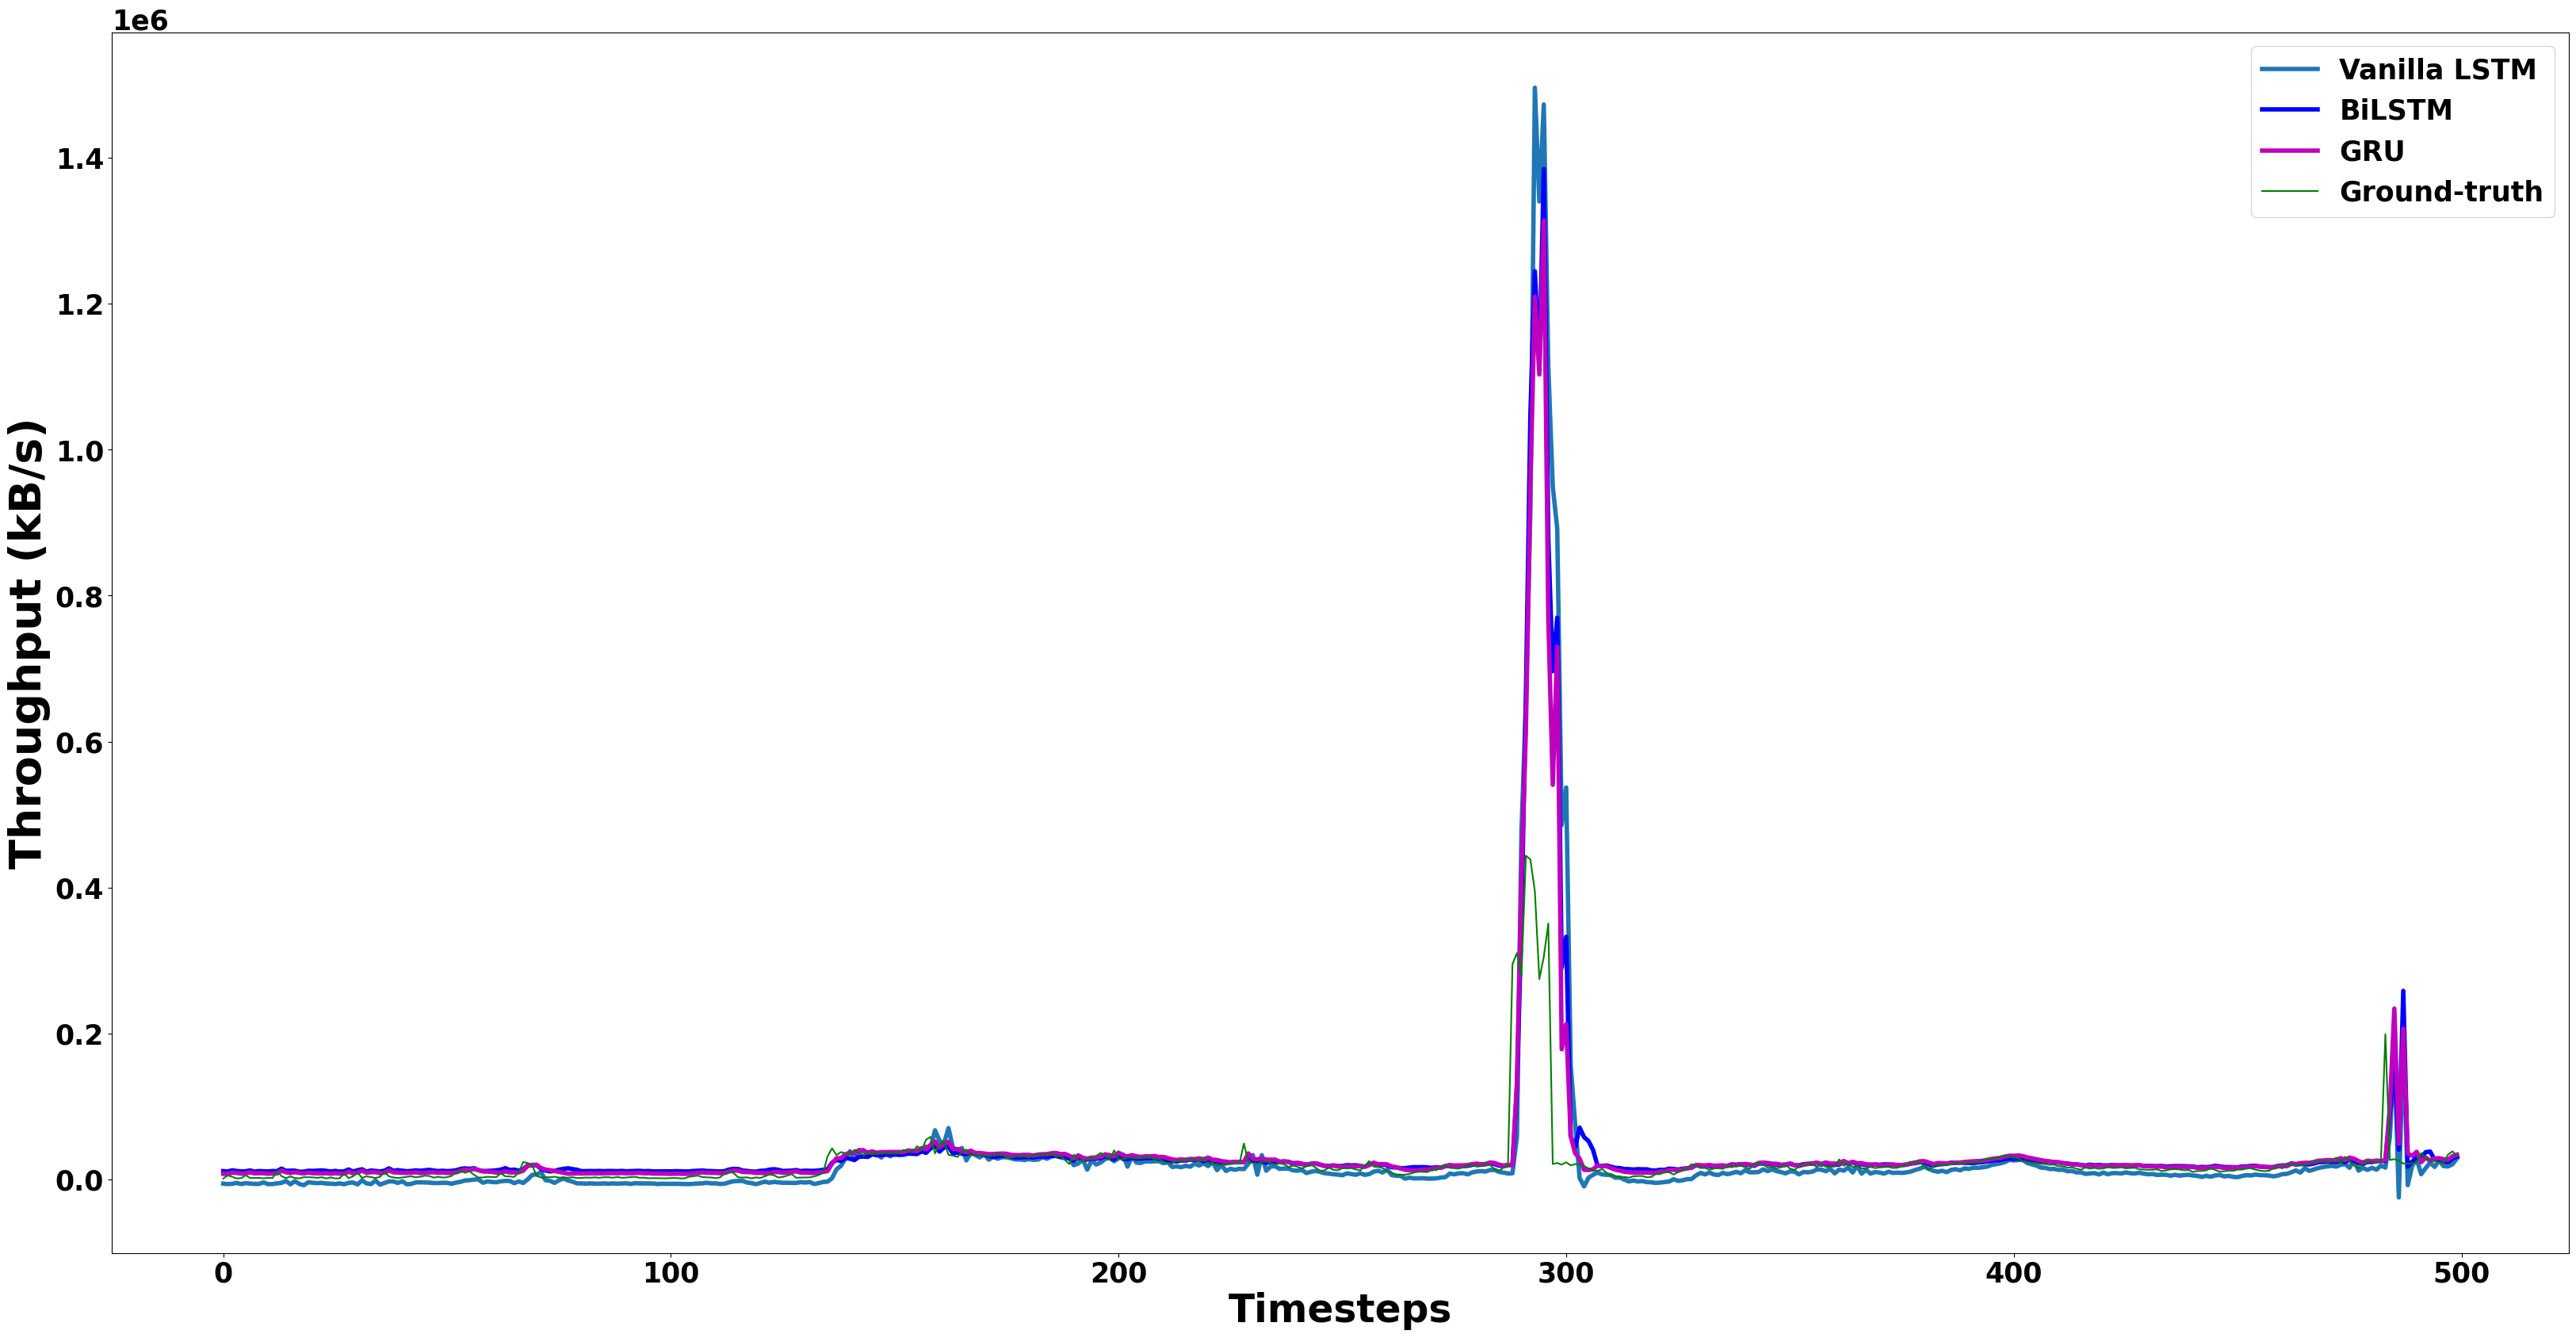

In [ ]:
timesteps = 500
plt.rcParams["figure.figsize"] = (40,20)
plt.rcParams.update({'font.size': 25, 'font.weight' : 'bold'})
plt.plot(vanilla_result[0:timesteps], label = "Vanilla LSTM",linewidth=4)
plt.plot(bilstm_result[0:timesteps], label = "BiLSTM",linewidth=4, color='b')
plt.plot(gru_result[0:timesteps], label = "GRU",linewidth=4, color='m')
plt.plot(true_testY[0:timesteps], label = "Ground-truth", color = 'g')
plt.xlabel('Timesteps', fontweight='bold', fontsize=35)
plt.ylabel('Throughput (kB/s)', fontweight='bold', fontsize = 40)
plt.legend()

In [ ]:
vanil_temp = 0
bi_temp = 0
gru_temp = 0

for i in range(len(testY)):
    vanil_temp += (testY[i] - vanilla_predict[i])**2
    bi_temp += (testY[i] - bilstm_predict[i])**2
    gru_temp += (testY[i] - gru_predict[i])**2

v_rmse = math.sqrt(vanil_temp / len(testY))
b_rmse = math.sqrt(bi_temp / len(testY))
g_rmse = math.sqrt(gru_temp / len(testY))

<BarContainer object of 3 artists>

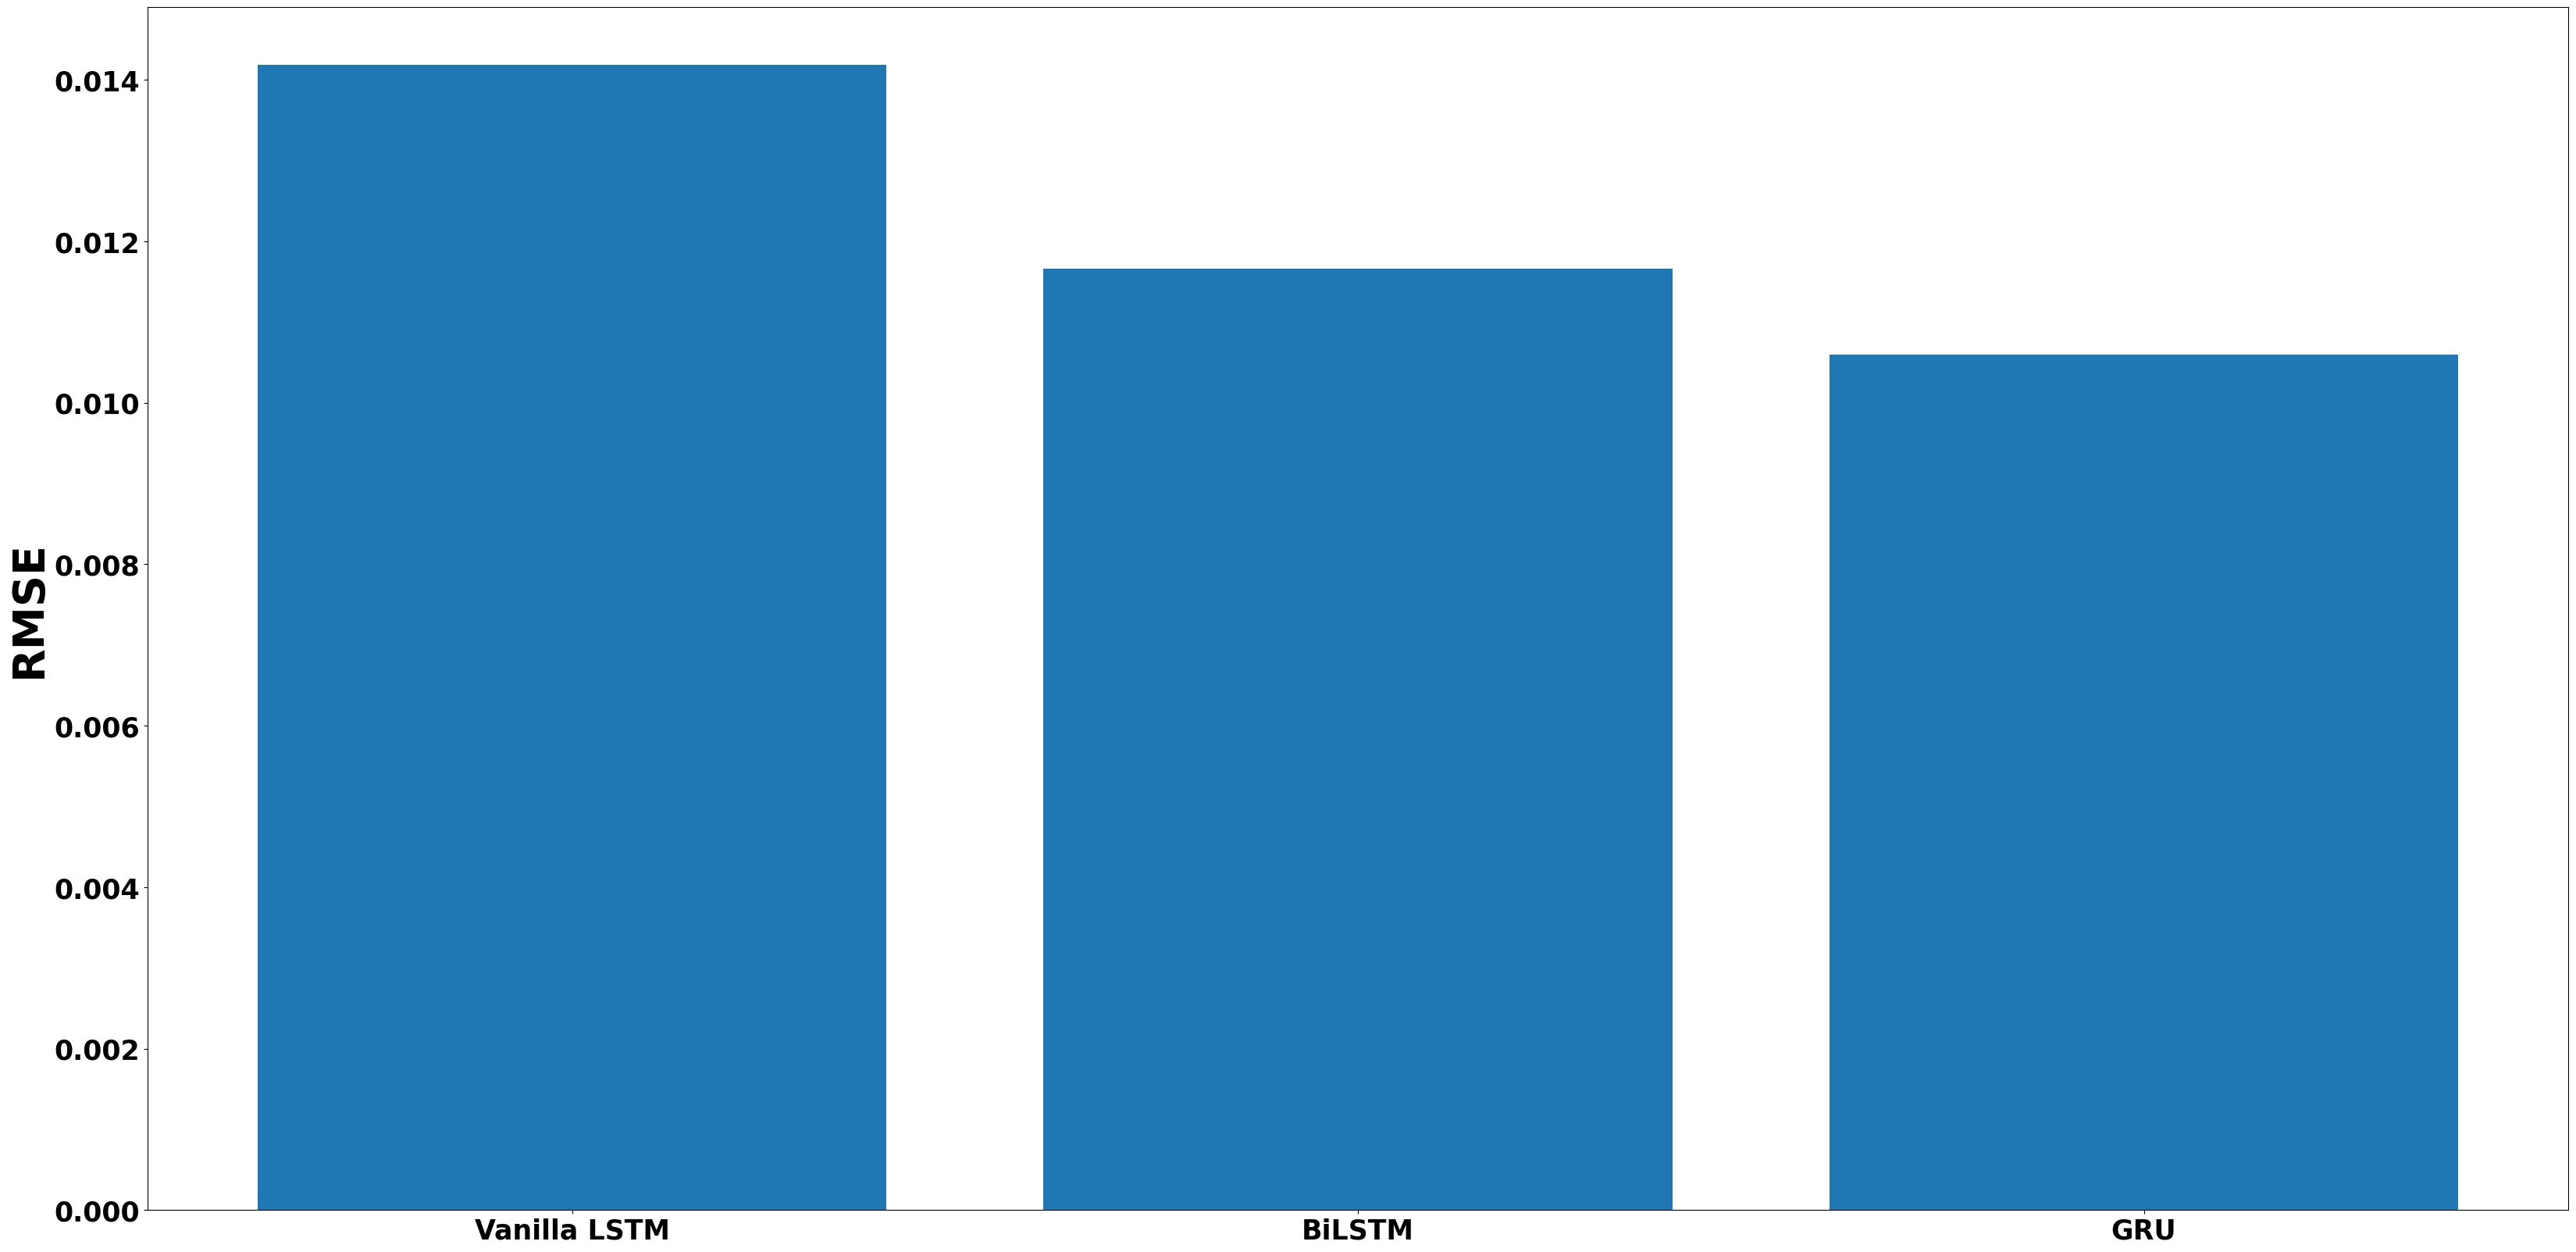

In [ ]:
fig = plt.figure()
names = ['Vanilla LSTM', 'BiLSTM', 'GRU']
values = [v_rmse,b_rmse,g_rmse]
plt.ylabel('RMSE', fontweight='bold',fontsize= 40)
# plt.ylim([0.006,0.0125])
plt.bar(names,values) 